# Proyecto académico final

## Materia: Análisis de datos y visualización

**Docente:** PhD. Janneth Alexandra Chicaiza Espinoza

**Integrantes:**
 - Rafael Guillermo Castro Merino
 - Santiago Andrés Mendieta Carrion
    
**Fecha:** 26/05/2024

## 1. Dataset: Sales prediction dataset

El conjunto de datos contiene información de compras de automóviles.

- Número de filas: 500

- Número de atributos/variables: 9 variables (3 categóricas y 6 numéricas).

- Información de las variables:
    - **customer name:** nombre del cliente
    - **customer e-mail:** correo electrónico del cliente
    - **country:** país de origen y de residencia del cliente
    - **gender:** género del cliente (0 para Femenino, 1 para Masculino)
    - **age:** edad del cliente
    - **annual Salary:** salario anual del cliente
    - **credit card debt:** deudas en la tarjeta de crédito del cliente
    - **net worth:** patrimonio neto del cliente(activos menos pasivos)
    - **car purchase amount:** monto de compra del automóvil que realiza el cliente
  
**Valores nulos:** Ninguno

**Autor:** Mohd Shahnawaz Aadil 

Se usará una copia del dataset "car_purchasing", disponible en Kaggle ("Sales prediction dataset"): https://www.kaggle.com/datasets/mohdshahnawazaadil/sales-prediction-dataset/data

### 1.1. Importación de Librerías 

In [1]:
# Librerías a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from termcolor import colored
from skimpy import skim
import seaborn as sns
import itertools

# Métodos de regresión no lineal:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import preprocessing # para el escalado
from sklearn.model_selection import GridSearchCV # para búsqueda de hiperparámetros

### Preparación de datasets (entrenamiento y test)
from sklearn.model_selection import train_test_split
import calendar

### 1.2. Carga del dataset

In [2]:
##Carga del dataset
data_url = "car_purchasing.csv"
data_inicial = pd.read_csv(data_url, sep=',', header=0, encoding='latin-1')  #Se utiliza codificación latin-1
data_inicial      #Imprimir el dataframe

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [3]:
data_inicial.sample(10)     #Sample del dataframe

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
279,Dominic I. Faulkner,pharetra.Nam@sociisnatoque.org,Tonga,0,47.797775,65530.36401,8774.069514,210573.70420,41034.28343
271,Mechelle W. Stanton,Pellentesque.habitant@auctorquistristique.org,Saint Barthélemy,0,46.306478,53382.42693,5055.435710,438491.87600,39549.13039
31,Adrienne Bolton,dictum@magnaPraesent.ca,Botswana,1,40.385463,68859.56489,13417.020270,486069.07300,44650.36073
288,Lester J. Burch,Nunc.mauris@commodo.com,Turkmenistan,0,40.601835,73498.30715,3066.939924,491904.18990,47610.11718
116,Dominic Hughes,cursus.vestibulum.Mauris@pedenonummy.com,Nepal,1,43.031069,69175.19403,6039.594519,325701.40830,42408.02625
275,Calvin A. Lancaster,ante.bibendum.ullamcorper@fringilla.net,South Africa,1,28.740244,69171.95281,6354.833826,613104.78400,38705.65839
87,Jared Green,laoreet@sagittis.edu,Macao,0,43.427517,50889.34054,11041.178910,448601.94840,36019.95560
50,Magee Davidson,Quisque@tempor.net,Turks and Caicos Islands,1,41.163848,38406.77890,11023.002680,451846.19950,27187.23914
231,Emerald U. Hanson,dui.quis.accumsan@pedeCrasvulputate.co.uk,United Arab Emirates,0,49.461686,77435.46545,6922.152838,48620.32123,44432.71747
10,Jerome Rowe,ipsum.cursus@dui.org,Sint Maarten,1,50.129923,73348.70745,8270.707359,612738.61710,59045.51309


## 2. EDA del dataset

## 2.1. Dimension del dataset

In [4]:
## Verificar las dimensiones del dataset
print(colored('\nDimensiones del dataset:', 'grey', 'on_cyan'))
data_inicial.shape    


Dimensiones del dataset:


(500, 9)

## 2.2. Resumen general de atributos del dataset

In [5]:
## Resumen general de los atributos del dataset
print(colored('\nResumen general de los atributos del dataset:', 'grey', 'on_cyan'))
data_inicial.info()


Resumen general de los atributos del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


## 2.3. Resumen de las variables numéricas

In [6]:
## Resumen de variables numéricas
print(colored('\nResumen de variables numéricas:', 'grey', 'on_cyan'))
data_inicial.describe()


Resumen de variables numéricas:


,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


## 2.4. Automatización del EDA univariado

In [7]:
### Automatizacion del EDA univariado
print(colored('\nAutomatizacion del EDA Univariado:', 'grey', 'on_cyan'))
skim(data_inicial)


Automatizacion del EDA Univariado:


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 500    │ │ float64     │ 5     │                                                          │
│ │ Number of columns │ 9      │ │ string      │ 3     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name          ┃ NA  ┃ NA %  ┃ mean   ┃ sd     ┃ p0    ┃ p25    ┃ p50    ┃ p75    ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ gender               │   0 │     0 │  0.506 │ 0.5005 │     0 │      0 │      1 │      1 │       1 │ ▇    ▇ │  │
│ │ age                  │   0 │     0 │  46.24 │  7.979 │    20 │  40.95 │  46.05 │  51.61 │      70 │  ▂▇▇▃▁ │  │
│ │ annual Salary        │   0 │     0 │  62130 │  11700 │ 20000 │  54390 │  62920 │  70120 │  100000 │  ▂▆▇▃  │  │
│ │ credit card debt     │   0 │     0 │   9608 │   3489 │   100 │   7398 │   9655 │  11800 │   20000 │ ▁▃▇▇▂▁ │  │
│ │ net worth            │   0 │     0 │ 431500 │ 173500 │ 20000 │ 299800 │ 426800 │ 557300 │ 1000000 │ ▂▆▇▇▂  │  │
│ │ car purchase amount  │   0 │     0 │  44210 │  10770 │  9000 │  37630 │  44000 │  51250 │   80000 │  ▃▇▇▃  │  │
│ └──────────────────────┴─────┴───────┴────────┴────────┴───────┴────────┴────────┴────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                     ┃ NA     ┃ NA %       ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ customer name                   │      0 │          0 │                        2.2 │                  1099 │  │
│ │ customer e-mail                 │      0 │          0 │                          1 │                   500 │  │
│ │ country                         │      0 │          0 │                        1.5 │                   748 │  │
│ └─────────────────────────────────┴────────┴────────────┴────────────────────────────┴───────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

**Análisis**: Existen 3 variables categóricas (3 string) y 6 variables numéricas (1 int32 y 5 float64).La variable gender (int 32) es originalmente categórica.

## 2.5. Verificación de valores nulos

In [8]:
## Comprobación del número de valores nulos
data_null_modificado=data_inicial.isnull().sum()  #Cantidad de valores nulos de cada columna
data_null_modificado                              #Se imprime la serie con los valores nulos

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

**Análisis**: Se comprueba que no existen valores nulos en el dataset.

## 2.6. Eliminación de columnas 

In [9]:
data=data_inicial.copy()  #Se crea una copia del dataframe
data.drop(columns=['customer name','customer e-mail'], inplace=True)  #Se eliminan las columnas 'customer name' y 'customer e-mail'
data                      #Se imprime el nuevo dataframe

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...
495,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


## 2.7. Verificación de la distribución de las variables

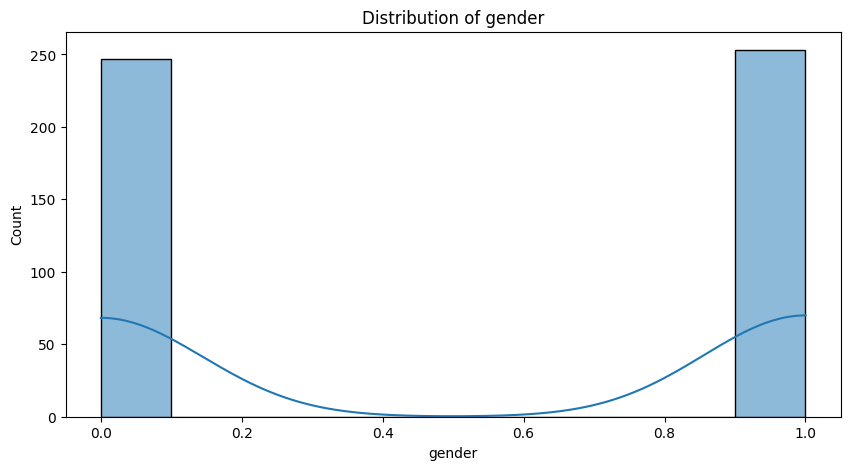

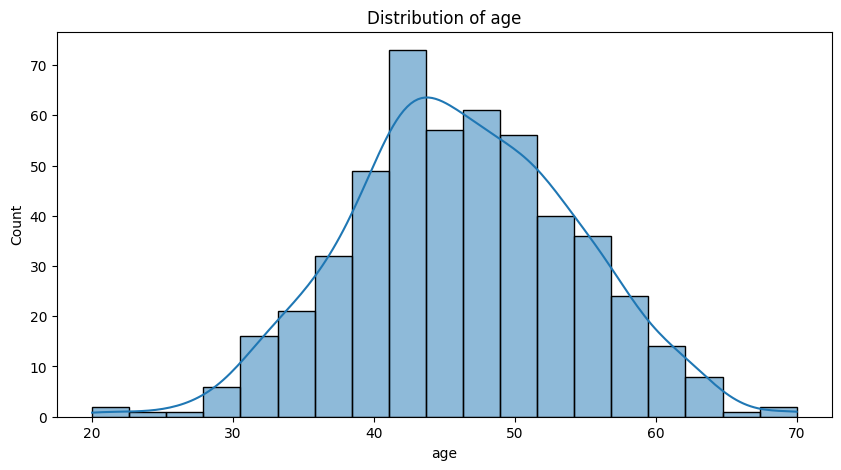

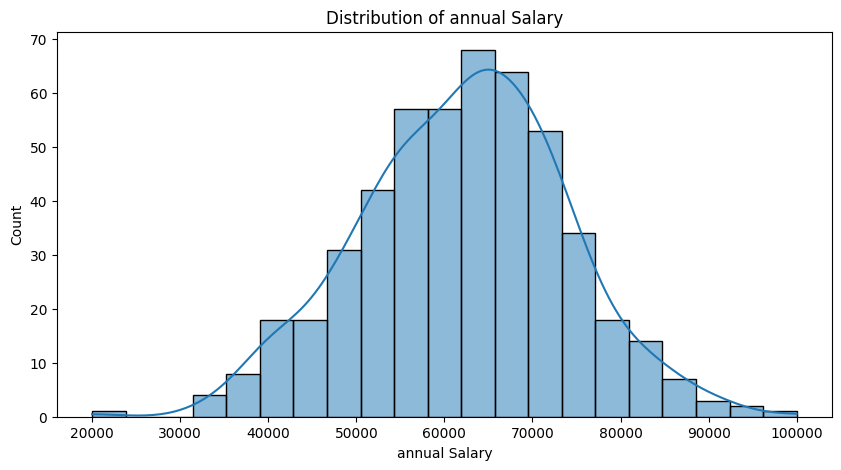

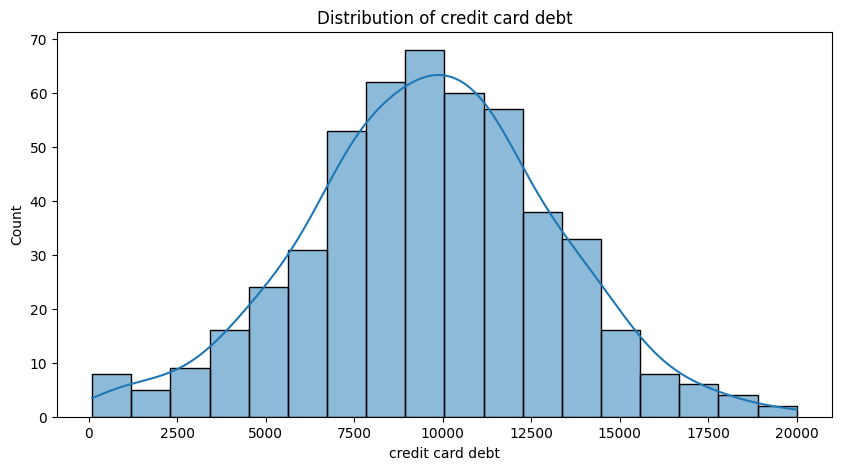

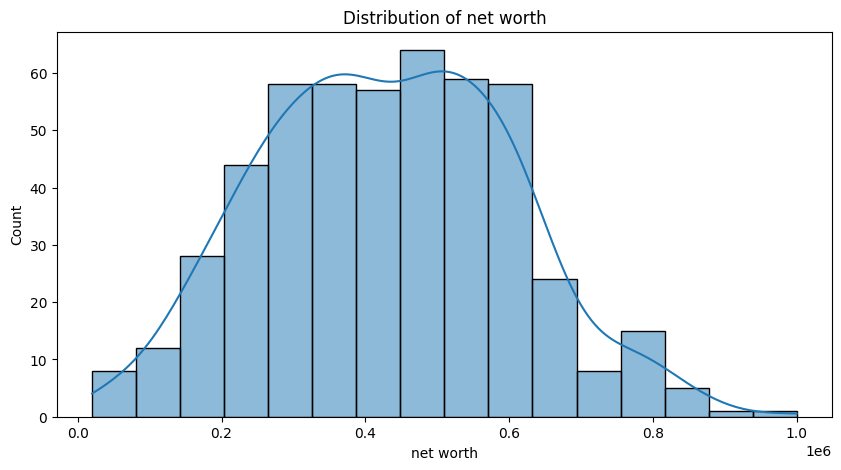

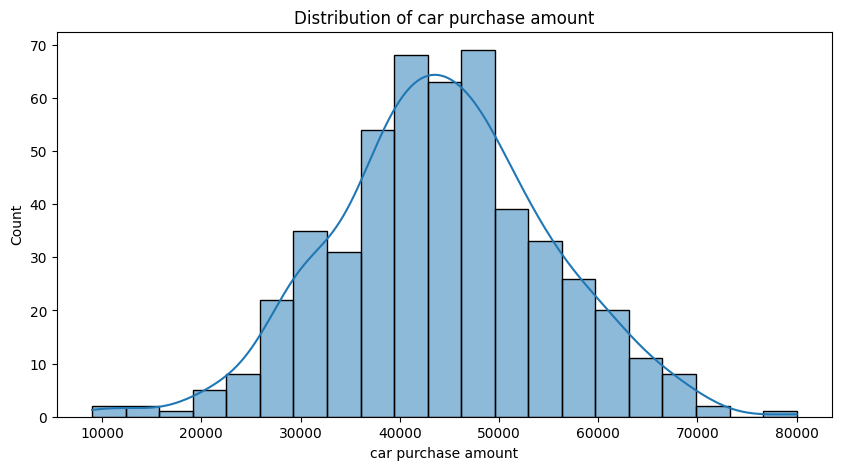

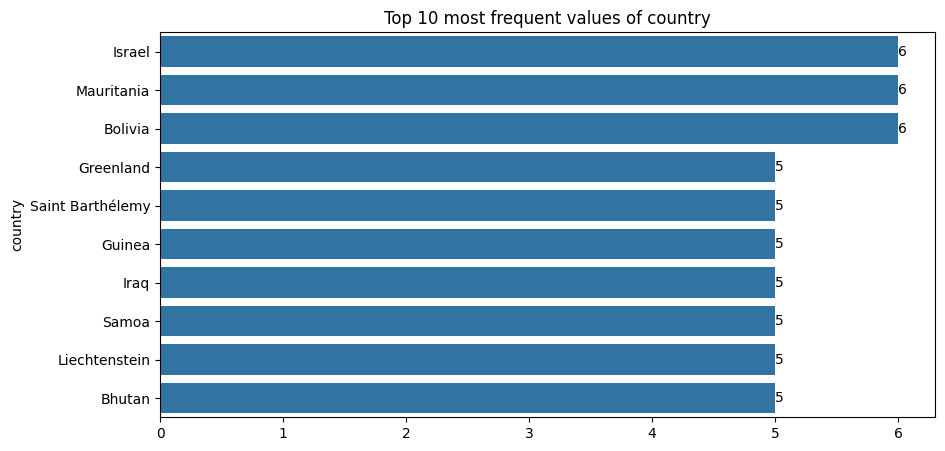

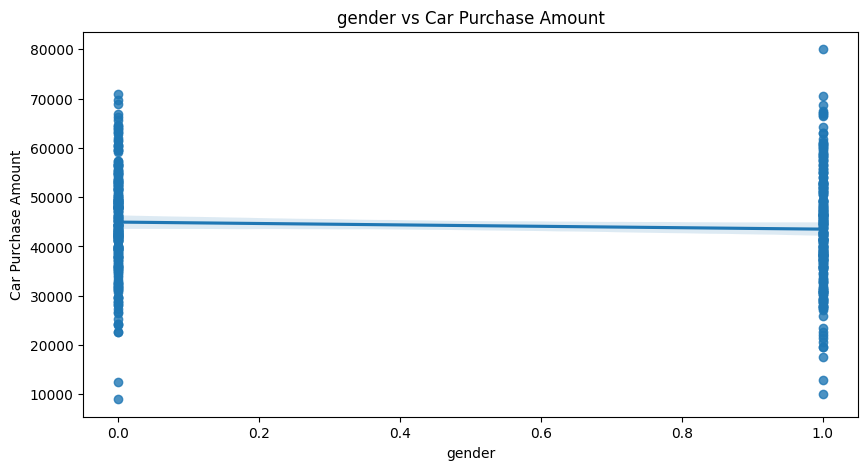

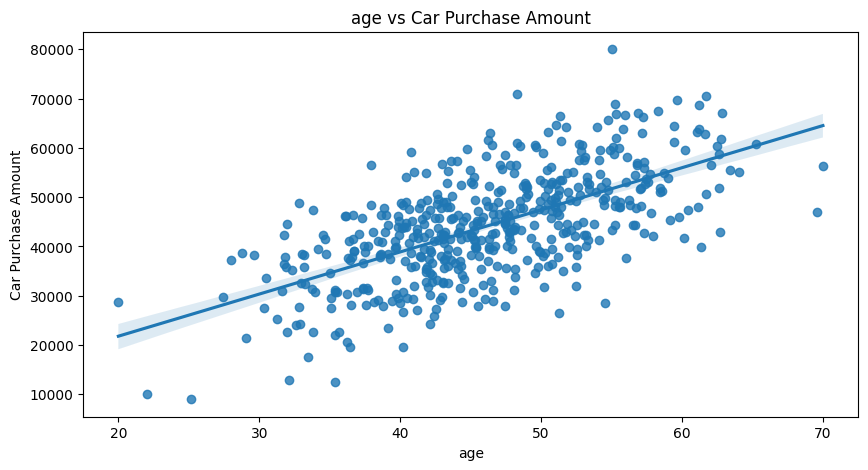

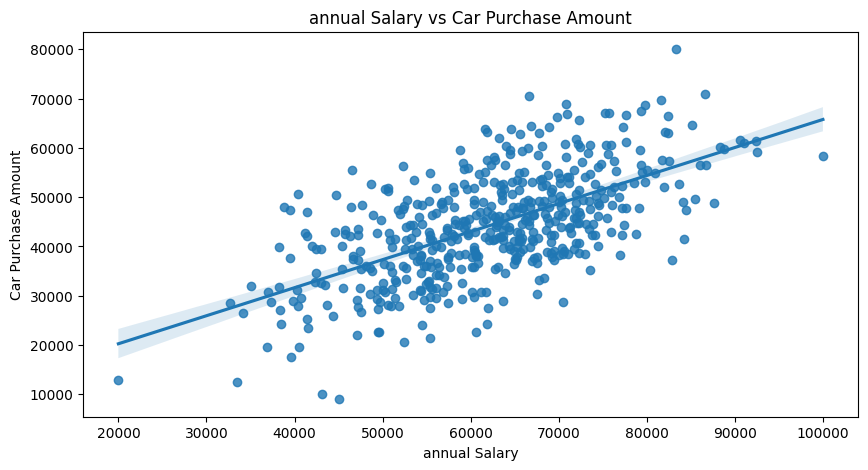

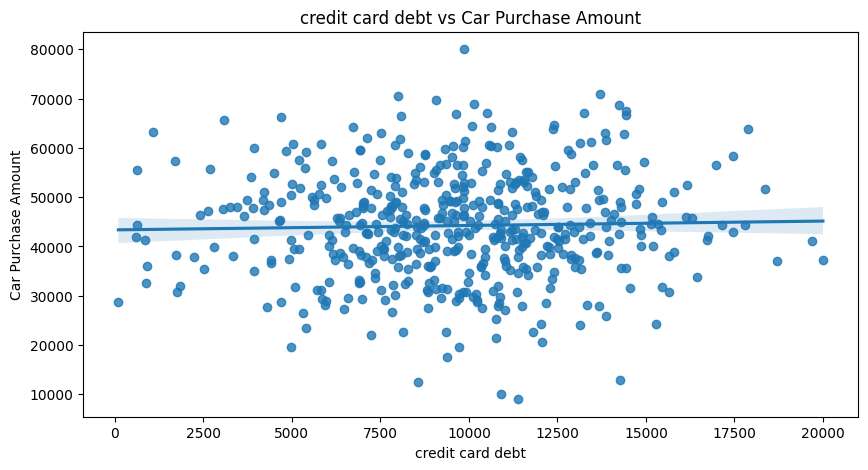

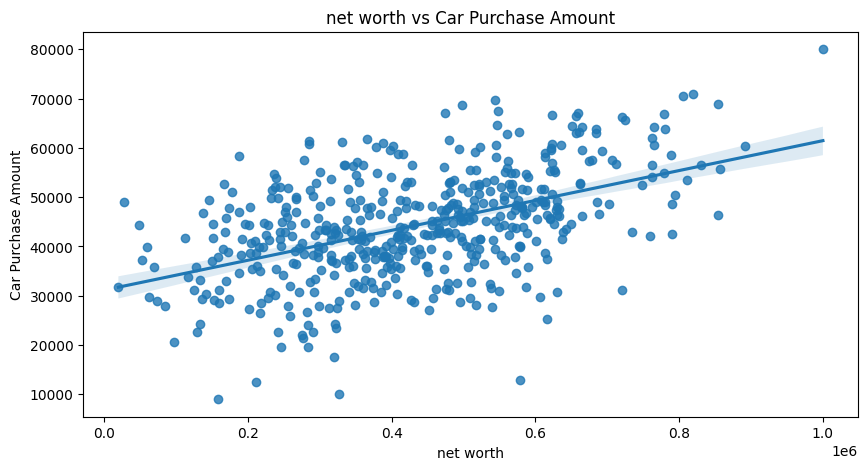

In [10]:
# Gráficos de distribución
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

categorical_cols = data.select_dtypes(include=['object', 'bool']).columns

# Gráficos de barras horizontales con los 10 valores más frecuentes para cada variable categórica
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    top_values = data[col].value_counts().nlargest(10)
    ax = sns.barplot(y=top_values.index, x=top_values.values)
    plt.title(f'Top 10 most frequent values of {col}')
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()

# Gráficos de dispersión con línea de regresión para variables numéricas
for col in numeric_cols:
    if col != 'car purchase amount':  # Evita graficar la variable dependiente contra sí misma
        plt.figure(figsize=(10, 5))
        sns.regplot(x=data[col], y=data['car purchase amount'])
        plt.title(f'{col} vs Car Purchase Amount')
        plt.xlabel(col)
        plt.ylabel('Car Purchase Amount')
        plt.show()

## 2.8. Verificación de la presencia de valores atípicos

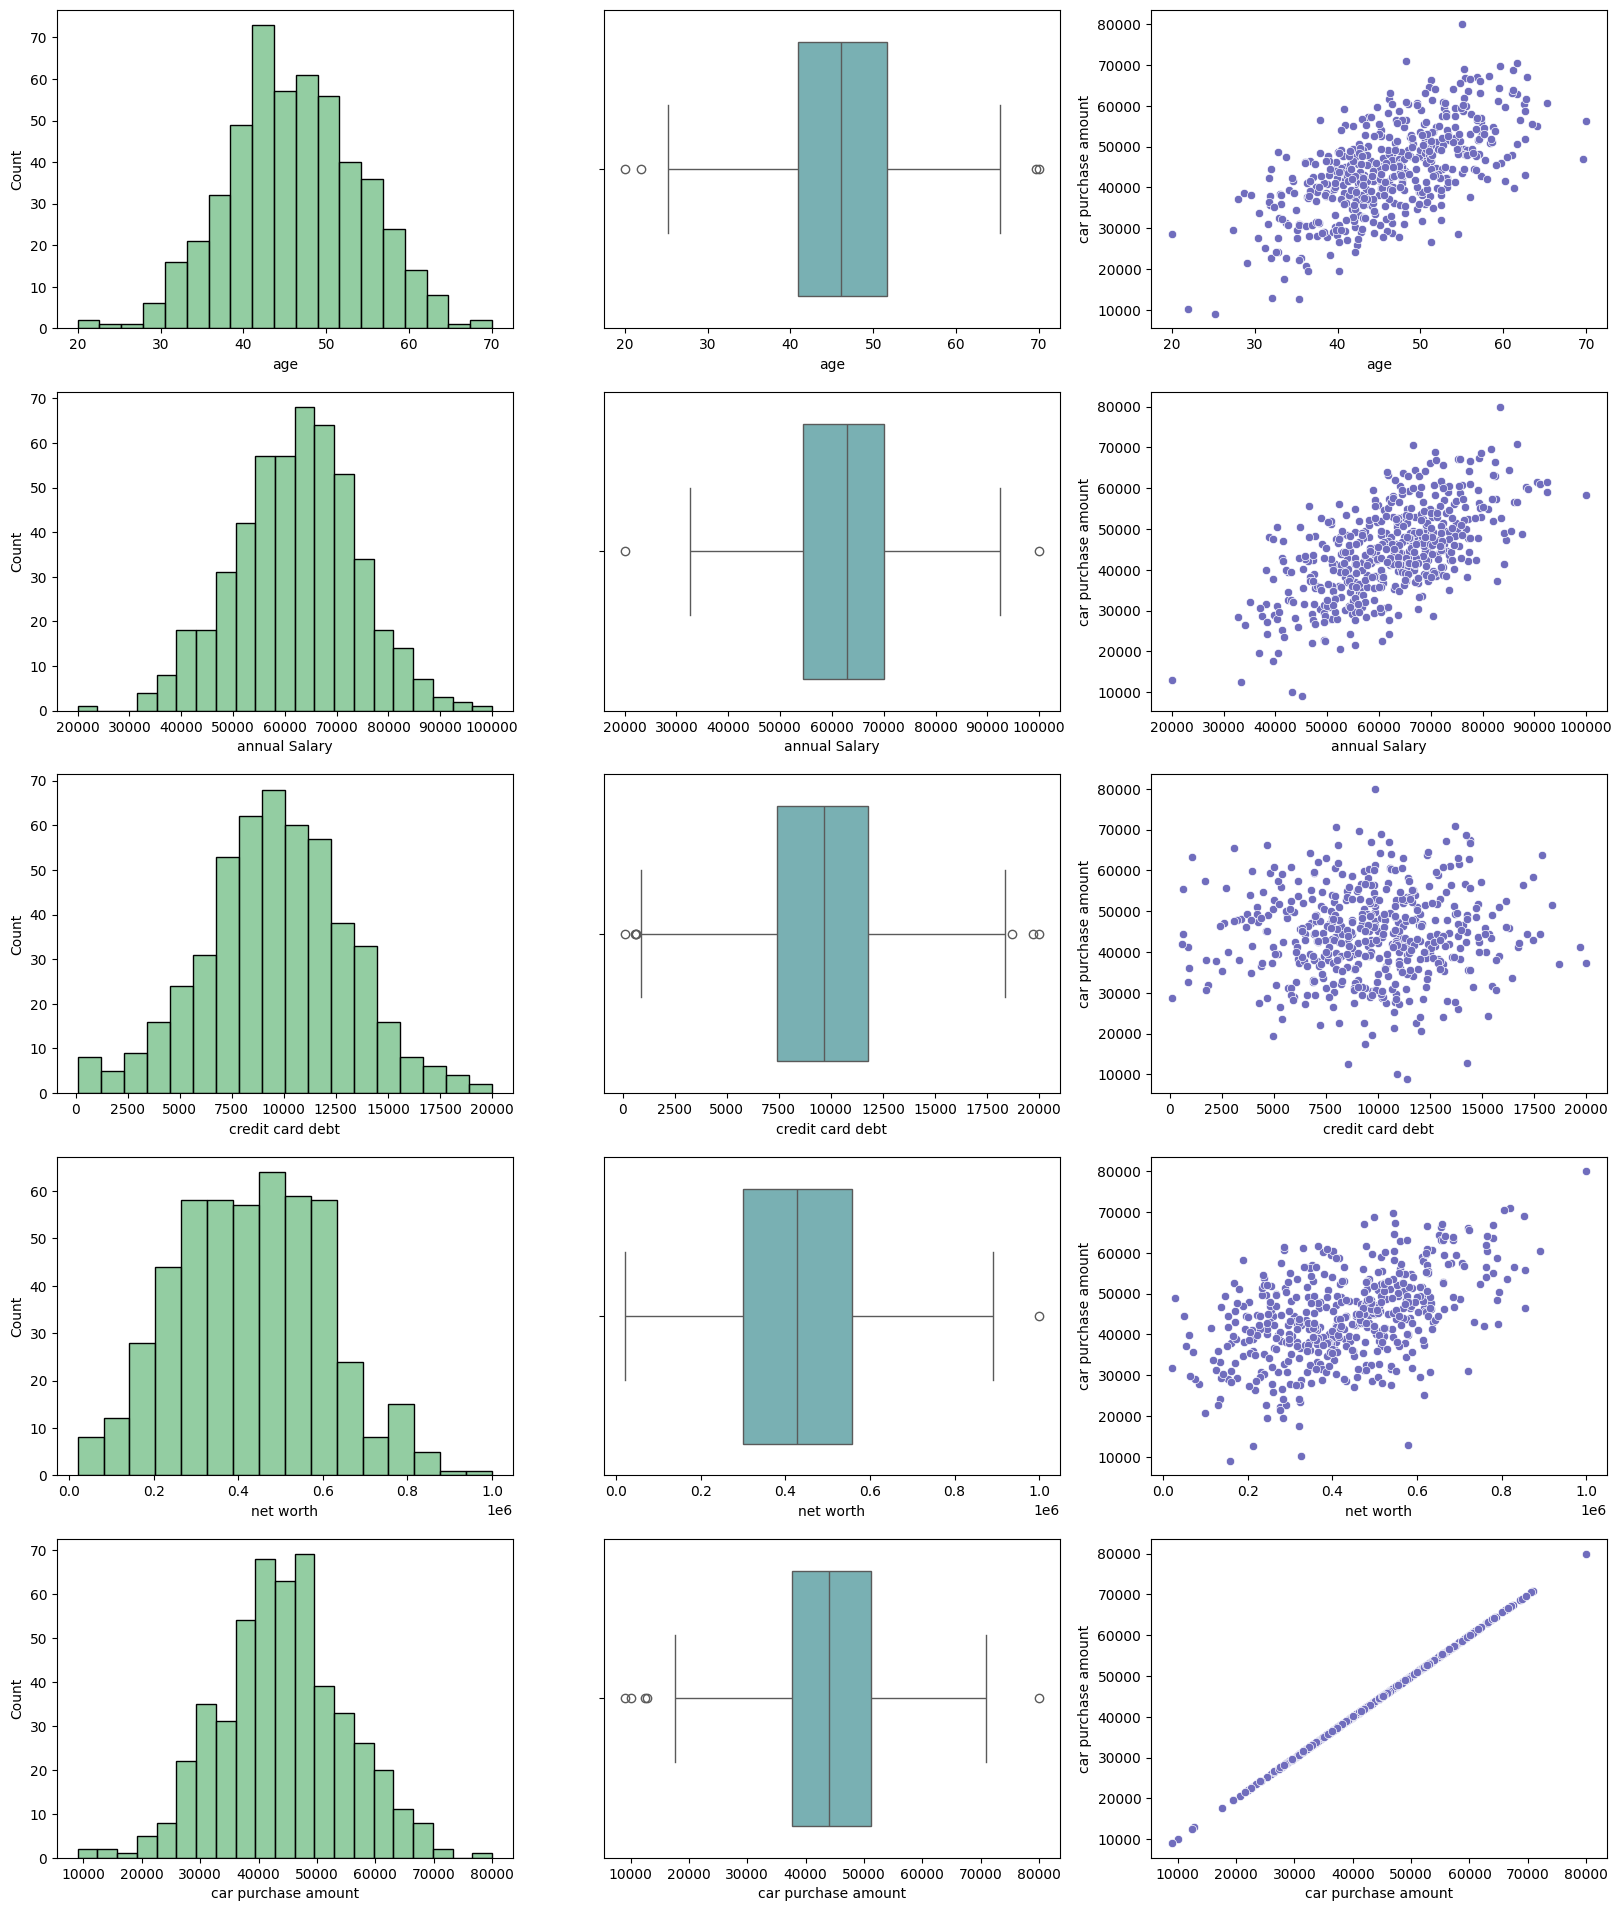

In [11]:
## Graficar histogramas, boxplots y diagramas de dispersión

var_num=['age','annual Salary','credit card debt','net worth', 'car purchase amount']   #Lista con las variables numéricas

# Evitar warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

# Función que imprime la distribución, boxplot e histograma por cada variable numérica:
def plot_base_relation(data, figsize=(20, 60)):
    columns = data.columns.tolist()
    _, axs = plt.subplots(len(columns), 3, figsize=figsize)
    
    for idx, column in enumerate(columns):
        # To get distribution of data
        sns.histplot(
            x=data[column],
            kde=False,
            color='#65b87b', alpha=.7,
            ax=axs[idx][0]
        )

        # To get knowledge about outliers
        sns.boxplot(
            x=data[column],
            color='#6fb9bd',
            ax=axs[idx][1]        
        )
        sns.scatterplot(
            x=data[column], y=data['car purchase amount'],
            color='#706dbd',
            ax=axs[idx][2]
        )
plot_base_relation(data[var_num], figsize=(20, 24))   # Visualizar los histogramas, los boxplot y los diagramas de dispersión de las variables

## 2.8. Correlación entre variables

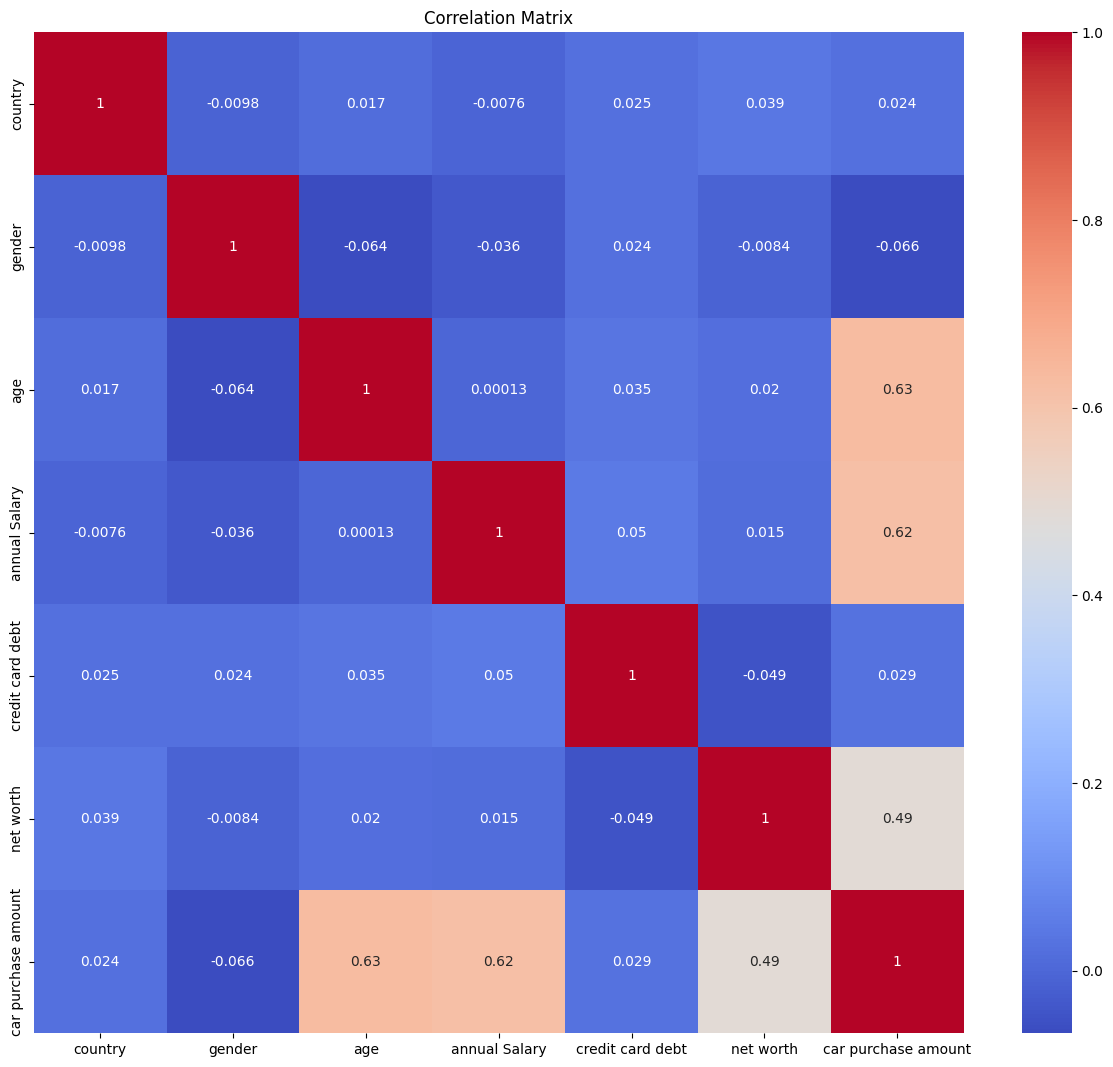

In [12]:
## Matriz de correlación
from sklearn.preprocessing import LabelEncoder

# Crear una copia del DataFrame original para no modificarlo directamente
data_numeric = data.copy()

# Lista de columnas categóricas
categorical_columns = ['country']

# Convertir las columnas categóricas a numéricas
label_encoder = LabelEncoder()
for column in categorical_columns:
    data_numeric[column] = label_encoder.fit_transform(data_numeric[column])

# Ahora calcula la matriz de correlación con las columnas convertidas
correlation_matrix = data_numeric.corr()
plt.figure(figsize=(15, 13))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Análisis**: La variable a predecir es: 'car purchase amount'. De la matriz se puede comprobar que las variables que presentan mayor correlación con la variable a predecir son: 'annual Salary' (0,62) y 'age' (0,63). Le sigue la variable 'net worth' (0,49). Y por último las variables que presentan muy baja correlación son: 'country' (0,024), 'credit card debt' (0,029) y'gender' (-0,066).

## 3. Preprocesamiento antes de la aplicación de modelos de predicción

## 3.1 Eliminación de outliers

In [13]:
## Identificacion de los valores atípicos
t=2                          #Umbral para detectar Outliers
lista_media=[]               #Lista vacía para el promedio 
lista_mediana=[]             #Lista vacía para la mediana
lista_diferencia=[]          #Lista vacía para la diferencia   

# Ciclo de repetición para calcular la media, mediana, la diferencia de las variables numéricas y el criterio
for fila in var_num:
    media=data[fila].mean()                   #Calcular el promedio
    mediana=data[fila].median()               #Calcular la mediana
    diferencia=media-mediana                  #Calcular la diferencia entre el promedio y la mediana
    lista_media.append(media)                 #Añadir el promedio a la lista de promedios
    lista_mediana.append(mediana)             #Añadir la mediana a la lista de medianas
    lista_diferencia.append(diferencia)       #Añadir la diferencia a la lista de diferencias
data_analisis=pd.DataFrame(lista_media,columns=['Media'])                         #Crear el dataframe con la lista de promedios
data_analisis.insert(data_analisis.shape[1], 'Mediana', lista_mediana)            #Añadir al dataframe la lista de medianas
data_analisis.insert(data_analisis.shape[1], 'Diferencia', lista_diferencia)      #Añadir al dataframe la lista de diferencias
data_analisis.index=var_num                                                       #Modificar el índice del dataframe de acuerdo a los nombres de las variables numéricas

# Funcion para comparar la diferencia con el umbral
def criterio(diferencia):
    diferencia_abs=abs(diferencia)    #Obtener el valor absoluto de la diferencia
    if diferencia_abs<=t:          
        return 'No'                   #Se devuelve 'No' cuando la diferencia es menor o igual al umbral
    else:
        return 'Si'                   #Se devuelve 'Si' cuando la diferencia es mayor al umbral
        
data_outliers=data_analisis.copy()                                                #Se realiza una copia del dataframa data_analisis
data_outliers.reset_index(inplace=True)                                           #Se resetea el índice y se conserva la columna de los índices
data_outliers.rename(columns={'index': 'Columna'}, inplace=True)                  #Se cambia el nombre de la columna índices
data_outliers['Supera el umbral']=data_outliers['Diferencia'].apply(criterio)     #Se aplica el criterio para las variables numéricas
data_outliers                                                                     #Se imprime el dataframe

,Columna,Media,Mediana,Diferencia,Supera el umbral
0,age,46.241674,46.049901,0.191773,No
1,annual Salary,62127.239608,62915.497035,-788.257427,Si
2,credit card debt,9607.645049,9655.035568,-47.390519,Si
3,net worth,431475.713625,426750.120650,4725.592975,Si
4,car purchase amount,44209.799218,43997.783390,212.015828,Si


**Análisis**: De acuerdo al dataframe anterior se puede afirmar que todas las variables numéricas tienen outliers a excepción de la variable 'age'. Sin embargo, de acuerdo a los gráficos de boxplot realizados anteriormente, se sabe que todas las variables tienen outliers.  
**Acción**: Se procede a identificar las filas de los outliers para todas las variables numéricas.

In [14]:
## Detección de outliers mediante IQR Score
def IQRscore(col):
    # Determinamos los límites o bordes:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    #print(IQR) rango intercuartílico
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return limite_inferior, limite_superior

def outliersIQR(col):
    limite_inferior, limite_superior = IQRscore(col)
    
    # outliers inferior:
    outliers1 = data[data[col] < limite_inferior][col]
    
    # outliers superior:
    outliers2 = data[data[col] > limite_superior][col]
    
    #Unir los dos conjuntos:
    return pd.concat([outliers1, outliers2], axis=0)

# Encontrar las filas afectadas por outliers univariantes, en cada columna:
lista_cantidad=[]                                           #Lista vacía para la cantidad de outliers
lista_porcentaje=[]                                         #Lista vacía para la cantidad de porcentajes de outliers
dimension=len(data)                                         #Dimension del dataframe data6
uniOutlier = {}                                             #Diccionario vacío para guardar las filas con outliers
colOutlier=var_num.copy()                                   #Lista con las variables numéricas con outliers
 
# Ciclo de repetición para detectar los outliers
for col in colOutlier: 
    uniOutlier[col] = outliersIQR(col).index.to_list()
    
#Ciclo de repetición para calcular la cantidad y porcentaje de outliers
for key in uniOutlier:
    cantidad=len(uniOutlier[key])                           #Cantidad de outliers
    porcentaje=round((cantidad/dimension)*100,2)            #Porcentaje de outliers
    lista_cantidad.append(cantidad)                         #Se añade la cantidad a la lista de cantidad de outliers
    lista_porcentaje.append(porcentaje)                     #Se añade el porcentaje a la lista de cantidad de porcentajes
    
cantidad_outliers=pd.DataFrame(colOutlier, columns=['Columna'])                               #Se crea un dataframe con las Columnas de outliers
cantidad_outliers.insert(cantidad_outliers.shape[1], 'Cantidad Outliers', lista_cantidad)     #Se añade una columna con la cantidad de outliers
cantidad_outliers.insert(cantidad_outliers.shape[1], 'Porcentaje Outliers', lista_porcentaje) #Se añade una columna con el porcentaje de outliers
cantidad_outliers                                                                             #Se imprime el dataframe

,Columna,Cantidad Outliers,Porcentaje Outliers
0,age,4,0.8
1,annual Salary,2,0.4
2,credit card debt,7,1.4
3,net worth,1,0.2
4,car purchase amount,5,1.0


**Análisis:** Se detectaron 4 outliers (0,8%) para la variable 'age', 2 outliers (0,4%) para la variable 'annual Salary', 7 outliers (1,4%) para la variable 'credit card debt', 1 outlier (0,2%) para la variable 'net worth', y 5 outliers (1%) para la variable 'car purchase amount'.  
**Acción:** Se opta por eliminar los outliers para todas las variables, dado que el porcentaje de outliers es bajo con respecto a la dimensión del dataframe.

In [15]:
## Se procede a eliminar los outliers
filas_outliers=list(uniOutlier.values())    #Lista de listas con las filas de los outliers
lista_filas_outliers=list(itertools.chain(*filas_outliers))  #Crear una sola lista con las filas de outliers
lista_unica_outliers=[]  #Lista vacia para almacenar las filas unicas con outliers

#Funcion para eliminar las filas repetidas
for fila in lista_filas_outliers:
    if fila not in lista_unica_outliers:
        lista_unica_outliers.append(fila)

data2=data.copy()    #Se crea una copia del dataframe
data2.drop(lista_unica_outliers, axis=0, inplace=True)                             #Se eliminan las filas con outliers
cant_outliers_eliminados=len(lista_unica_outliers)                                 #Cantidad total de outliers eliminados
dimension=len(data2)                                                               #Dimension del nuevo dataset
porc_outliers_eliminados=round((cant_outliers_eliminados/dimension)*100,2)         #Porcentaje total de outliers eliminados
data2.index=range(0,dimension)                                                     #Actualizar el indice de acuerdo al nuevo numero de filas
print('Cantidad total de outliers eliminados:', cant_outliers_eliminados)          #Se imprime la cantidad total de outliers eliminados
print('Porcentaje total de outliers eliminados:', porc_outliers_eliminados, '%')   #Se imprime el porcentaje total de outliers eliminados
print('Cantidad de filas del nuevo dataframe:', dimension, '\n')                   #Se imprime la cantidad de filas del nuevo dataframe
data2                                                                              #Se imprime el dataframe

Cantidad total de outliers eliminados: 15
Porcentaje total de outliers eliminados: 3.09 %
Cantidad de filas del nuevo dataframe: 485 



,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...
480,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
481,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
482,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
483,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


### 3.2. Modificación de variables

In [16]:
## Copia del dataframe
data3=data2.copy()

## Cambio de la variable numérica continua 'age' (float64) a variable numérica discreta (int64)
data3['age']=data3['age'].map(lambda x: round(x))               #Redondear el valor de la edad

## Cambio de la variable categórica 'country' a numérica
label_encoder = preprocessing.LabelEncoder()                    #Se declara un objeto de la clase LaberEncoder
data3['country']= label_encoder.fit_transform(data3['country']) #Se cambia la variable country a numérica

## Cambio de la variable numérica continua 'age' (float64) a variable numérica discreta (int64)
data3['age']=data3['age'].map(lambda x: round(x))  #Redondear el valor de la edad
data3                                              #Se imprime el dataset con las variables modificadas

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,27,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,17,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,1,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,41,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,26,1,57,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...
480,127,0,41,71942.40291,6995.902524,541670.1016,48901.44342
481,207,1,38,56039.49793,12301.456790,360419.0988,31491.41457
482,143,1,54,68888.77805,10611.606860,764531.3203,64147.28888
483,24,1,59,49811.99062,14013.034510,337826.6382,45442.15353


In [17]:
## Verificación de los cambios realizados
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485 entries, 0 to 484
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              485 non-null    int32  
 1   gender               485 non-null    int64  
 2   age                  485 non-null    int64  
 3   annual Salary        485 non-null    float64
 4   credit card debt     485 non-null    float64
 5   net worth            485 non-null    float64
 6   car purchase amount  485 non-null    float64
dtypes: float64(4), int32(1), int64(2)
memory usage: 24.8 KB


**Análisis**: Se puede observar que la variable categórica 'country' (string) se ha transformado en variable numérica discreta (int32). Y tambien la variable numérica continua 'age' (float64) se ha transformado en variable numérica discreta (int32).

## 4. Exploración inicial mediante Decision Tree

### 4.1. Asignacion de variables predictoras y variable a predecir

In [18]:
column_names=data3.columns                     #Nombre de las columnas del dataset
x_columns = column_names[0:data3.shape[1]-1]   #Nombre de las columnas de las variables predictoras
y_column = column_names[data3.shape[1]-1]      #Nombre de la columna de la variable a predecir

X = data3[x_columns]   # variables predictoras: country, gender, age, annual Salary, credit card debt y net worth
y = data3[y_column]    # variable a predecir: car purchase amount

### 4.2. Creación de datasets para el training y testing

In [19]:

X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=10, shuffle=True)


### 4.3. Entrenamiento

In [20]:
#############
# Training
#############
dtr = DecisionTreeRegressor(random_state = 10) # Crear una instancia de DecisionTreeRegressor
dtr.fit(X_train, y_train)                      #Crear el modelo a partir del dataset de entrenamiento

DecisionTreeRegressor(random_state=10)

### 4.4. Parámetros utilizados

In [21]:
#############
# Imprimir parámetros usados por el modelo
#############
print('Max features:', dtr.max_features_)           #Imprimir el número máximo de características a considerar para buscar la mejor división
print('Depth:', dtr.get_depth())                    #Imprimir la profundidad del árbol (distancia entre el nodo raíz y cualquier nodo hoja)
print('N_leaves:', dtr.get_n_leaves())              #Imprimir numero de hojas del arbol
print('Min samples leaf:', dtr.min_samples_leaf)    #Imprimir el numero de muestras (u observaciones) mínimas requeridas en un nodo terminal u hoja
print('Min samples split :', dtr.min_samples_split) #Imprimir el número mínimo de observaciones que se requieren en un nodo para ser considerado para la división

Max features: 6
Depth: 14
N_leaves: 388
Min samples leaf: 1
Min samples split : 2


### 4.5. Importancia de las variables

In [22]:
#############
# Importancia de las variables al momento de crear el modelo
#############
importances_sk = dtr.feature_importances_                            #Obtener coeficientes de las variables
feature_importances_df=pd.DataFrame(x_columns, columns=['Columna'])  #Crear dataframe con el nombre de las variables predictoras
feature_importances_df['Importancia']=importances_sk                 #Crear columna importancia
feature_importances_df.sort_values(by='Importancia', ascending=False, inplace=True) #Ordenar las filas de mayor a menor
feature_importances_df.reset_index(drop=True, inplace=True)          #Reiniciar el índice
feature_importances_df                                               #Imprimir el dataframe

,Columna,Importancia
0,annual Salary,0.421085
1,age,0.335691
2,net worth,0.228583
3,credit card debt,0.009735
4,country,0.004277
5,gender,0.000628


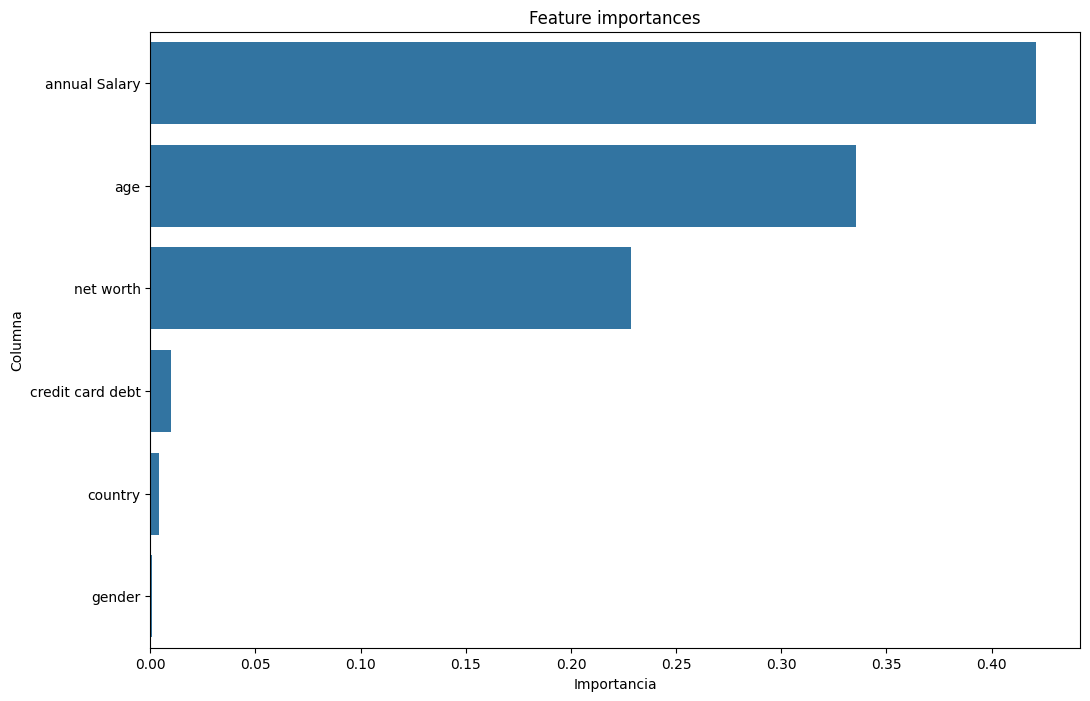

In [23]:
## Graficar la importancia de cada variable en un diagrama de barras
plt.figure(figsize=(12,8))
sns.barplot(x=feature_importances_df['Importancia'], y=feature_importances_df['Columna'])
plt.title('Feature importances')
plt.show()  

**Análisis:** De acuerdo a la gráfica, las variables gender (0,000628), country (0,004277) y credit card debt (0,009735) tienen pocan importancia para la predicción del modelo. Por otro lado, las variables net worth (0,228583), age (0,335691) y annual Salary (0,421085) son las que tienen una gran importancia en la predicción del modelo.  
**Acción:** Utilizar solamente las variables net worth, age y annual Salary para la aplicación de los modelos de predicción.

### 4.6. Predicción del modelo

In [24]:
#############
# Predicción
#############
y_test_predicted = dtr.predict(X_test) #Generar predicción para el dataset de test
dtr_predictions = pd.DataFrame({'Valor real':y_test,'Valor predecido': y_test_predicted}) #Crear dataframe (y_real, y_test_predicted)
dtr_predictions[:30]                   #Imprimir 30 filas del dataframe

,Valor real,Valor predecido
152,31837.22537,38763.11306
380,47970.76767,43503.97349
262,39549.13039,38042.80065
358,29754.66271,36645.56090
312,22630.25982,27815.73813
474,59538.40327,63140.05082
441,32967.20191,29092.13110
199,51683.60859,51941.67560
421,35475.00344,41769.38288
359,60960.83428,61593.52058


<Axes: >

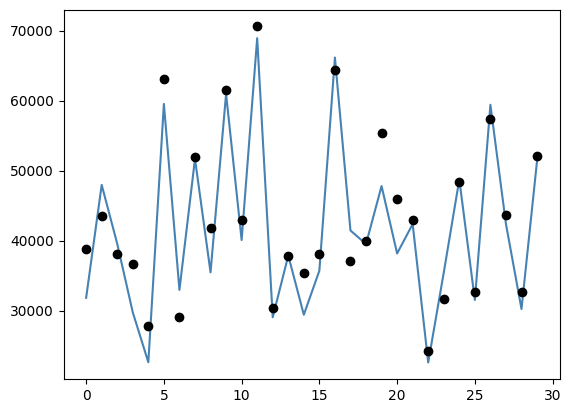

In [25]:
###################
#Visualización de los resultados (Para saber cómo se está comportando el modelo)
###################

# Visualizar los valores reales de y (líneas azuales) vs. los valores predichos (puntos negros).

pd.Series(y_test[:30].tolist()).plot(color='steelblue')  # Valores reales
pd.Series(y_test_predicted[:30].tolist()).plot(marker="o", linewidth=0, color='black') #Valores generados por el modelo

### 4.7. Evaluación del modelo

In [26]:
################################
# Evaluación
################################

# Train dataset:
dt_score_train_0 = dtr.score(X_train, y_train)  #Precision en los datos de entrenamiento
print('Accuracy_score on train dataset : ', dt_score_train_0)

# Test dataset:
dt_score_0 = dtr.score(X_test,y_test)
dt_mse_0 = np.mean((y_test - y_test_predicted)**2)

print("Accuracy_score of model: %f" % dt_score_0)  #Precision del modelo
print("Mean Squared Error: %f" % dt_mse_0)   #MSE del modelo

Accuracy_score on train dataset :  1.0
Accuracy_score of model: 0.834480
Mean Squared Error: 18974245.974755


## 5. Aplicación de modelos predictivos

### 5.1. Asignacion de variables predictoras y variable a predecir

In [27]:
data4=data3.copy()                              #Copia del dataframe
data4.drop(columns=['gender'], inplace=True)             #Se elimina la columna gender
data4.drop(columns=['country'], inplace=True)            #Se elimina la columna country
data4.drop(columns=['credit card debt'], inplace=True)   #Se elimina la columna credit card debt
column_names=data4.columns                      #Nombre de las columnas del dataset
x_columns=column_names[0:data4.shape[1]-1]      #Nombre de las columnas de las variables predictoras
y_column = column_names[data4.shape[1]-1]       #Nombre de la columna de la variable a predecir
X = data4[x_columns]   # variables predictoras: age, annual Salary y net worth
y = data4[y_column]    # variable a predecir: car purchase amount

### 5.2. Creación de datasets para el training y testing

In [28]:

X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=10, shuffle=True)


### 5.3 Modelo 1: Árbol de decisión (Decision tree)

#### 5.3.1 Entrenamiento mediante Grid Search & Cross Validation

In [29]:
#############
# Training
#############
dtr = DecisionTreeRegressor(random_state=10, 
                            max_features=1.0)

params = {'min_samples_split': range(2, 20, 2), #range(start, stop, step)
          'min_samples_leaf': range(2, 20, 2),
          'max_depth': range(5, 15)}
    
grid_search = GridSearchCV(dtr, param_grid=params, cv=10)
grid_search.fit(X_train, y_train) #Entrenamiento

GridSearchCV(cv=10,
             estimator=DecisionTreeRegressor(max_features=1.0, random_state=10),
             param_grid={'max_depth': range(5, 15),
                         'min_samples_leaf': range(2, 20, 2),
                         'min_samples_split': range(2, 20, 2)})

#### 5.3.2 Parámetros utilizados

In [30]:
#############
# Imprimir parámetros usados por el modelo
#############
dt_best_params=grid_search.best_params_                          #Obtener los mejores parámetros
dt_max_features=1                                                #Declaracion de max features
dt_max_depth=dt_best_params['max_depth']                         #Obtener max depth
dt_min_samples_leaf=dt_best_params['min_samples_leaf']           #Obtener min samples leaf
dt_min_samples_split=dt_best_params['min_samples_split']         #Obtener min samples split
print('Max features:', dt_max_features)                          #Imprimir el número máximo de características a considerar para buscar la mejor división
print('Max_depth:', dt_max_depth)                                #Imprimir la profundidad del árbol (distancia entre el nodo raíz y cualquier nodo hoja)
print('Min_samples_leaf:', dt_min_samples_leaf)                  #Imprimir el numero de muestras (u observaciones) mínimas requeridas en un nodo terminal u hoja
print('Min_samples_split:', dt_min_samples_split)                #Imprimir el número mínimo de observaciones que se requieren en un nodo para ser considerado para la división

Max features: 1
Max_depth: 14
Min_samples_leaf: 2
Min_samples_split: 2


#### 5.3.3 Predicción del modelo

In [31]:
#############
# Predicción
#############
best_model = grid_search.best_estimator_       #Obtener el mejor modelo
y_test_predicted = best_model.predict(X_test)  #Realizar la predicción
dtr_predictions = pd.DataFrame({'Valor real':y_test,'Valor predecido': y_test_predicted}) #Crear dataframe (y_real, y_test_predicted)
dtr_predictions[:30]                            #Imprimir las primeras 30 filas del dataframe

,Valor real,Valor predecido
152,31837.22537,33498.401830
380,47970.76767,46972.798880
262,39549.13039,38965.699270
358,29754.66271,37675.933607
312,22630.25982,26183.412870
474,59538.40327,62883.551285
441,32967.20191,30914.966435
199,51683.60859,53159.055930
421,35475.00344,38103.885565
359,60960.83428,61073.324360


<Axes: >

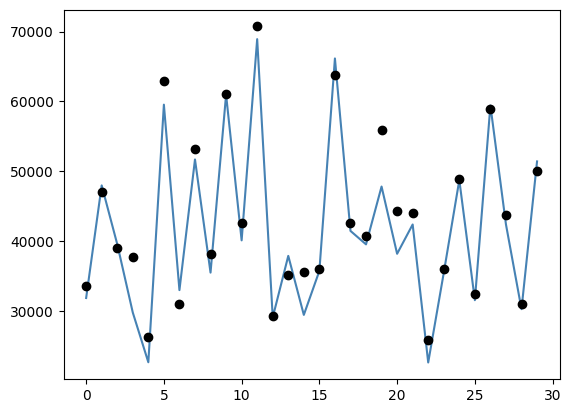

In [32]:
###################
#Visualización de los resultados (Para saber cómo se está comportando el modelo)
###################

# Visualizar los valores reales de y (líneas azuales) vs. los valores predichos (puntos negros).

pd.Series(y_test[:30].tolist()).plot(color='steelblue')  # Valores reales
pd.Series(y_test_predicted[:30].tolist()).plot(marker="o", linewidth=0, color='black') # Valores generados por el modelo

#### 5.3.4. Evaluación del modelo

In [33]:
################################
# Evaluación
################################

# Train dataset:
dt_score_train = best_model.score(X_train, y_train)           #Precision en los datos de entrenamiento
print('Accuracy_score on train dataset : ', dt_score_train)

# Test dataset:
dt_score= best_model.score(X_test,y_test)
dt_mse = np.mean((y_test - y_test_predicted)**2)

print("Accuracy_score of model: %f" % dt_score)               #Precision del modelo
print("Mean Squared Error: %f" % dt_mse)                      #MSE del modelo

Accuracy_score on train dataset :  0.9886890530032699
Accuracy_score of model: 0.894966
Mean Squared Error: 12040481.352483


### 5.4 Modelo 2: Bosque aleatorio (Random forest)

#### 5.4.1. Entrenamiento mediante Grid Search & Cross Validation

In [34]:
#############
# Training
#############
rf = RandomForestRegressor(n_estimators= 100, 
                           random_state = 10, 
                           max_features=1.0,
                           oob_score=True)

params ={'max_depth':range(9,13),
         'min_samples_leaf':range(1,3),
         'min_samples_split':range(2,10,2)
}
grid_search = GridSearchCV(rf,param_grid=params,cv=10)
grid_search.fit(X_train, y_train)   #Entrenamiento

GridSearchCV(cv=10,
             estimator=RandomForestRegressor(oob_score=True, random_state=10),
             param_grid={'max_depth': range(9, 13),
                         'min_samples_leaf': range(1, 3),
                         'min_samples_split': range(2, 10, 2)})

#### 5.4.2. Parámetros utilizados

In [35]:
#############
# Imprimir parámetros usados por el modelo
#############
rf_best_params=grid_search.best_params_                          #Obtener los mejores parámetros
rf_max_features=1                                                #Declaracion de max features
rf_max_depth=rf_best_params['max_depth']                         #Obtener max depth
rf_min_samples_leaf=rf_best_params['min_samples_leaf']           #Obtener min samples leaf
rf_min_samples_split=rf_best_params['min_samples_split']         #Obtener min samples split
print('Max features:', rf_max_features)                             #Imprimir el número máximo de características a considerar para buscar la mejor división
print('Max_depth:', rf_max_depth)                                #Imprimir la profundidad del árbol (distancia entre el nodo raíz y cualquier nodo hoja)
print('Min_samples_leaf:', rf_min_samples_leaf)                  #Imprimir el numero de muestras (u observaciones) mínimas requeridas en un nodo terminal u hoja
print('Min_samples_split:', rf_min_samples_split)                #Imprimir el número mínimo de observaciones que se requieren en un nodo para ser considerado para la división

Max features: 1
Max_depth: 12
Min_samples_leaf: 1
Min_samples_split: 2


#### 5.4.3. Predicción del modelo

In [36]:
#############
# Predicción
#############
best_model = grid_search.best_estimator_       #Obtener el mejor modelo
y_test_predicted = best_model.predict(X_test)  #Realizar la predicción
rf_predictions = pd.DataFrame({'Valor real':y_test,'Valor predecido': y_test_predicted}) #Crear dataframe (y_real, y_test_predicted)
rf_predictions[:30]                            #Imprimir las primeras 30 filas del dataframe

,Valor real,Valor predecido
152,31837.22537,35893.424074
380,47970.76767,48144.450085
262,39549.13039,39929.035494
358,29754.66271,33603.334493
312,22630.25982,25184.504242
474,59538.40327,61113.856475
441,32967.20191,32639.844663
199,51683.60859,50724.391144
421,35475.00344,37769.925924
359,60960.83428,58711.548071


<Axes: >

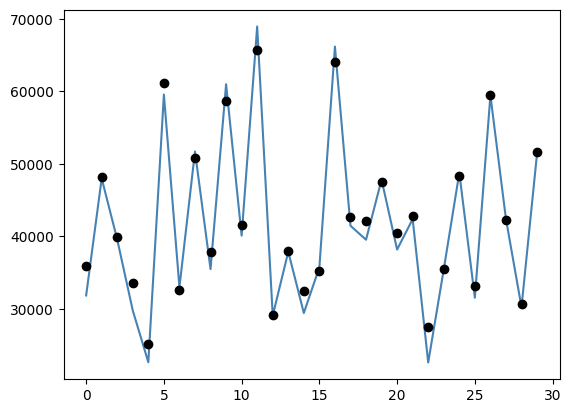

In [37]:
###################
#Visualización de los resultados (Para saber cómo se está comportando el modelo)
###################

# Visualizar los valores reales de y (líneas azuales) vs. los valores predichos (puntos negros).

pd.Series(y_test[:30].tolist()).plot(color='steelblue')  # Valores reales
pd.Series(y_test_predicted[:30].tolist()).plot(marker="o", linewidth=0, color='black') # Valores generados por el modelo

#### 5.4.3. Evaluación del modelo

In [38]:
################################
# Evaluación
################################

# Train dataset:
rf_score_train = best_model.score(X_train, y_train)           #Precision en los datos de entrenamiento
print('Accuracy_score on train dataset : ', rf_score_train)

# Test dataset:
rf_score= best_model.score(X_test,y_test)
rf_mse = np.mean((y_test - y_test_predicted)**2)

print("Accuracy_score of model: %f" % rf_score)               #Precision del modelo
print("Mean Squared Error: %f" % rf_mse)                      #MSE del modelo

Accuracy_score on train dataset :  0.993466622042856
Accuracy_score of model: 0.965079
Mean Squared Error: 4003171.135050


## 6. Resultados obtenidos

In [39]:
## Agrupar los resultados obtenidos en un dataframe
nombre_columnas=['Modelos de evaluación','P1: Max Features', 'P2: Max Depth', 'P3: Min Samples Leaf', 'P4: Min Samples Split', 'Precisión train', 'Precisión modelo', 'MSE']
lista_col_metricas=['Modelo 1: Decision Tree', 'Modelo 2: Random Forest']
lista_col_mf=[dt_max_features, rf_max_features]
lista_col_md=[dt_max_depth, rf_max_depth]
lista_col_msl=[dt_min_samples_leaf, rf_min_samples_leaf]
lista_col_mss=[dt_min_samples_split, rf_min_samples_split]
lista_score_train=[dt_score_train, rf_score_train]
lista_score=[dt_score, rf_score]
lista_mse=[dt_mse, rf_mse]
lista_unida=[]
lista_unida.append(lista_col_metricas)
lista_unida.append(lista_col_mf)
lista_unida.append(lista_col_md)
lista_unida.append(lista_col_msl)
lista_unida.append(lista_col_mss)
lista_unida.append(lista_score_train)
lista_unida.append(lista_score)
lista_unida.append(lista_mse)
resultados_df=pd.DataFrame(lista_unida).transpose()
resultados_df.columns=nombre_columnas
resultados_df.index=range(1, len(lista_col_metricas)+1)
resultados_df

,Modelos de evaluación,P1: Max Features,P2: Max Depth,P3: Min Samples Leaf,P4: Min Samples Split,Precisión train,Precisión modelo,MSE
1,Modelo 1: Decision Tree,1,14,2,2,0.988689,0.894966,12040481.352483
2,Modelo 2: Random Forest,1,12,1,2,0.993467,0.965079,4003171.13505


## 7. Conclusiones

 - Las variables que tiene muy poca importancia en la predicción del modelo son: gender (0,000628), country (0,004277) y credit card debt (0,009735). Por lo que se concluye que el género (gender), el país (country) y la deuda en la tarjeta de crédito (credit card debt) influyen muy poco en el monto de compra de automóviles (car purchase amount).
 - Las variables que tienen mayor importancia en la predicción del modelo son:  net worth (0,228583), age (0,335691) y annual Salary (0,421085). Por lo que se puede afirmar que el patrimonio neto (net worth), la edad (age) y los ingresos anuales (annual Salary) son las caractaterísticas que se deben tomar en cuenta para poder predecir el monto de compra de automóviles (car purchase amount).
 - Se obtuvo una precisión de 0,894966 para el modelo 1: árbol de decisión (decision tree), y una precisión de 0,965079 para el modelo 2: bosque aleatorio (random forest). Por lo que el modelo de random forest es el que mejor predice la variable 'car purchase amount'.